## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

### Some EDA

In [2]:
df = pd.read_csv('../../../high_diamond_ranked_10min.csv')
#importing the data

In [3]:
df.head()
#checking out the firt 5 rows

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
df[['blueGoldDiff','redGoldDiff']]

,blueGoldDiff,redGoldDiff
0,643,-643
1,-2908,2908
2,-1172,1172
3,-1321,1321
4,-1004,1004
...,...,...
9874,2519,-2519
9875,782,-782
9876,-2416,2416
9877,-839,839


In [5]:
df.info()
#looking at datatypes, and if there are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

## First train test split and baseline logreg model

In [6]:
y = df['blueWins']
X = df.drop(['gameId', 'blueWins', 'redGoldDiff', 'redExperienceDiff'], axis=1)
#setting our target variable and everything else

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
#tts for the first logreg

In [8]:
print(y.value_counts())
#making sure there is no class imbalance

0    4949
1    4930
Name: blueWins, dtype: int64


In [9]:
logreg = LogisticRegression(max_iter=10)
#instantiating the first logreg model
logreg.fit(X_train, y_train)
#fitting the training data

/Users/joe/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

In [10]:
prediction = logreg.predict(X_test)
#making the first set of predictions

In [11]:
logreg.coef_

array([[-2.52466268e-06, -6.68424525e-08,  1.26872014e-07,
         3.23719347e-07, -4.84012076e-07,  3.11320128e-07,
         4.22743897e-07,  3.95787611e-07,  2.69562868e-08,
        -1.29545849e-08,  1.46828586e-04,  5.55667457e-09,
         7.77037677e-05, -2.01558772e-06,  2.43032303e-06,
         2.88741432e-04,  1.59934620e-04, -2.01558772e-07,
         1.46828586e-05, -2.36811295e-06, -2.38471505e-07,
        -1.29586127e-07, -4.84012076e-07,  3.23719347e-07,
        -5.34677994e-07, -3.96493942e-07, -3.72668573e-07,
        -2.38253684e-08,  2.32077025e-08, -1.41912846e-04,
        -3.01199808e-08, -8.22308520e-05,  3.09445999e-06,
         2.97819540e-08,  3.09445999e-07, -1.41912846e-05]])

### First baseline model results

In [12]:
print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, prediction))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, prediction))


----------------------------------------
Accuracy Score:
0.7230769230769231
----------------------------------------
Confusion Matrix:
[[881 344]
 [340 905]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1225
           1       0.72      0.73      0.73      1245

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



# Decision Tree, Bagged Trees and Random Forrest Classifier

In [90]:
#setting target and everything else
y = df['blueWins']
X = df.drop(columns=['gameId', 'blueWins'])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)
#train test split for rfc

In [92]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [93]:
# Feature importance
tree_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02775427, 0.        , 0.        ,
       0.        , 0.        , 0.01057537, 0.        , 0.00568796,
       0.80283923, 0.02245132, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00319803, 0.        , 0.        ,
       0.        , 0.00346072, 0.        , 0.        , 0.        ,
       0.        , 0.01388357, 0.00168421, 0.00240351, 0.09824999,
       0.00155216, 0.00625967, 0.        ])

In [94]:
print(len(X.columns))
print(len(tree_clf.feature_importances_))

38
38


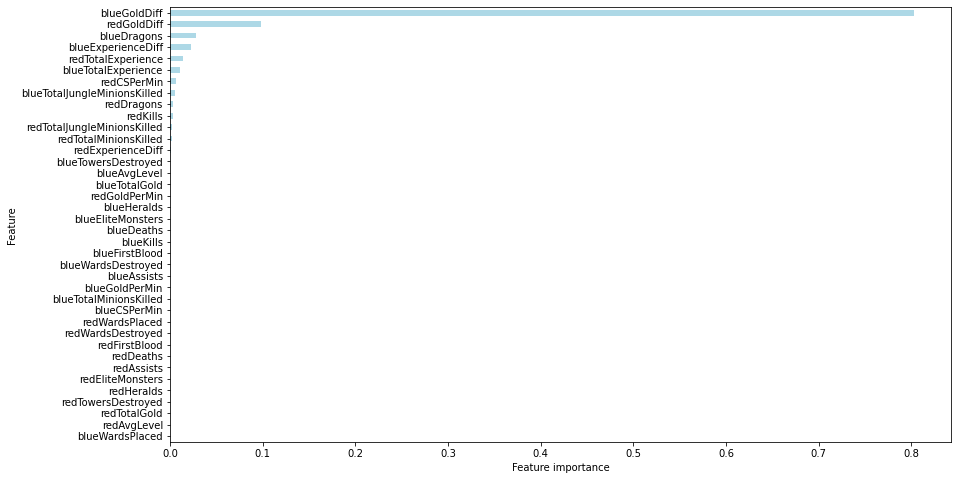

In [96]:
def plot_feature_importances(model):
    plt.figure(figsize=(14,8))
    pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='barh', color='lightblue')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [18]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[883 372]
 [357 858]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1255
           1       0.70      0.71      0.70      1215

    accuracy                           0.70      2470
   macro avg       0.70      0.70      0.70      2470
weighted avg       0.70      0.70      0.70      2470



In [19]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 70.49%


# Bagging Tree

In [20]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [21]:
bagged_tree.fit(X_train, y_train)
#fitting the training data

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [22]:
bagged_tree.score(X_train, y_train)
#training score

0.7527331623700905

In [23]:
bagged_tree.score(X_test, y_test)
#testing score

0.7097165991902834

# Random Forest

In [24]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
#instatiating and fitting a random forrest

RandomForestClassifier(max_depth=5)

In [25]:
# Training accuracy score
forest.score(X_train, y_train)

0.7489539748953975

In [26]:
# Test accuracy score
forest.score(X_test, y_test)

0.708502024291498

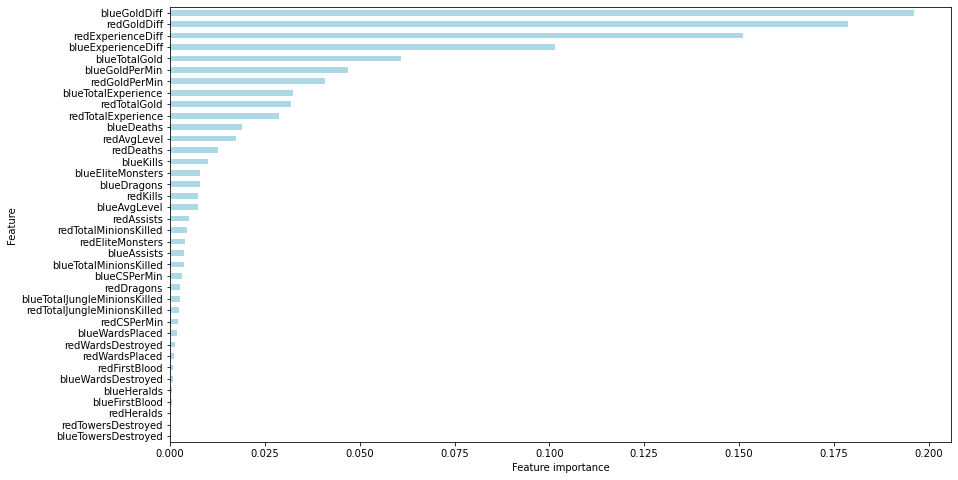

In [97]:
plot_feature_importances(forest)
#looking at feature importance

top 5 features against target
explain what we tried but not in depth
bring it back to the business problem

# Grid Search

In [28]:
#setting target and everything else
y = df['blueWins']
X = df.drop(['gameId', 'blueWins'], axis=1)

In [29]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
dt_clf = DecisionTreeClassifier()
#instantiating a decision tree
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
#getting the cross val score after 3 cross validations 
mean_dt_cv_score = np.mean(dt_cv_score)
#taking the mean of that score

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")
#printing formatting

Mean Cross Validation Score: 63.56%


In [31]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}
#makaing a parameter grid for the decision tree so it can decide which is the best to use

In [32]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [33]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 76.82%
Mean Test Score: 71.38%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [34]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 71.91%


In [35]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [36]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 73.25%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 100}


In [37]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.7137651821862349
Random forest grid search:  0.719838056680162


# ADA and Gradient boosting 

In [38]:
#setting target and everything else
y = df['blueWins']
X = df.drop(['gameId', 'blueWins'], axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier()

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier()

In [41]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [42]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [43]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [44]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7315427183155622
F1-Score: 0.7240948813982522

Model: Gradient Boosted Trees
Accuracy: 0.7539479012012418
F1-Score: 0.7507860560492139

Testing Metrics
Model: AdaBoost
Accuracy: 0.7174089068825911
F1-Score: 0.7167207792207793

Model: Gradient Boosted Trees
Accuracy: 0.728744939271255
F1-Score: 0.7304907481898633


In [45]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[889, 323],
       [375, 883]])

In [46]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[892, 320],
       [350, 908]])

In [47]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1212
           1       0.73      0.70      0.72      1258

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



In [48]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1212
           1       0.74      0.72      0.73      1258

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470



# KNN

In [49]:
# imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

In [50]:
y = df['blueWins']
X = df.drop(['gameId', 'blueWins'], axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
# ss = StandardScaler()
# ss.fit(X_train)
# X_train_sc = ss.transform(X_train)
# X_test_sc = ss.transform(X_test)

In [53]:
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train_sc, y_train)

In [54]:
# confusion_matrix(y_test, knn.predict(X_test_sc))

In [55]:
# from sklearn.metrics import accuracy_score

# y_pred = knn.predict(X_test_sc)

# accuracy = accuracy_score(y_test, y_pred)
# accuracy

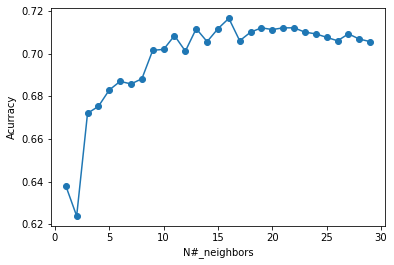

0.6720647773279352


In [56]:
k_range = range(1,30)
scores = list()
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred_knn))
plt.plot(k_range,scores,marker="o")
plt.ylabel("Acurracy")
plt.xlabel("N#_neighbors")
plt.show()
knn =  KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn))

# XGBOOST

In [57]:
from xgboost import XGBClassifier

In [58]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [59]:
y = df['blueWins']
X = df.drop(['gameId', 'blueWins', 'redTowersDestroyed', 'blueTowersDestroyed', 'redHeralds', 'blueHeralds'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 96.56%
Validation accuracy: 70.2%


In [61]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [62]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Testing accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 85.33%
Testing accuracy: 71.3%


Talk about why we went for accuracy and how we went thru that thought process

we got a baseline with tons of good things
not actually obtainable
made it a real model

comparing the target to other features
showing the correlation between some of the features and if theyre going to win 

red kills
blue kills
red avg level
red avg level
blue total jungle minions killed

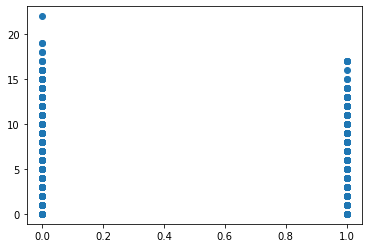

In [104]:
x = df['blueWins']
y = df['redKills']
plt.scatter(x,y)
plt.show()

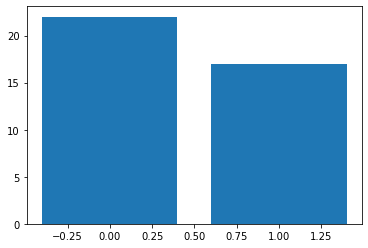

In [105]:
x = df['blueWins']
y = df['redKills']
plt.bar(x,y)
plt.show()

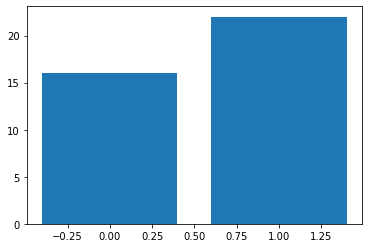

In [106]:
x = df['blueWins']
y = df['blueKills']
plt.bar(x,y)
plt.show()

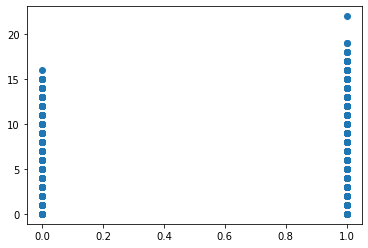

In [107]:
x = df['blueWins']
y = df['blueKills']
plt.scatter(x,y)
plt.show()

<AxesSubplot:xlabel='redAvgLevel', ylabel='blueWins'>

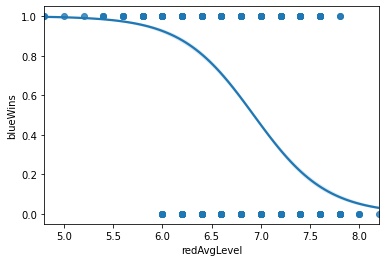

In [114]:
sns.regplot(x='redAvgLevel',y='blueWins', data=df, logistic=True)

In [ ]:
x = df['blueWins']
y = df['redKills']
plt.scatter(x,y)
plt.show()

In [ ]:
x = df['blueWins']
y = df['redKills']
plt.scatter(x,y)
plt.show()

In [ ]:
x = df['blueWins']
y = df['redKills']
plt.scatter(x,y)
plt.show()

In [ ]:
red avg level
red avg level
blue total jungle minions killed

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu